In [1]:
# !pip install opencv-python

In [2]:
# !pip install librosa

In [3]:
import numpy as np
import pandas as pd
import pickle

from glob import glob
import librosa
import cv2

import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
import sys

lib_path = os.path.abspath("../../../lib")
sys.path.append(lib_path)

from easy_keras import KerasMLPClassifier, load_model

In [5]:
clf = load_model(KerasMLPClassifier, 'voice_command_model')

In [6]:
saved_env = pickle.load(open('voice_command_env.pickle', 'rb'))

In [7]:
scaler = saved_env

In [8]:
def get_img(voice_data, sampling_data, mode):
    if mode == 'spec':
        stft = np.abs(librosa.core.spectrum.stft(voice_data))
        return librosa.amplitude_to_db(stft, ref=np.max)
    elif mode == 'mel':
        stft = np.abs(librosa.feature.melspectrogram(voice_data))
        return librosa.amplitude_to_db(stft, ref=np.max)
    elif mode == 'chrom':
        stft = np.abs(librosa.core.spectrum.stft(voice_data))
        return librosa.feature.chroma_stft(S=stft, sr=sampling_rate)

In [9]:
import librosa.display

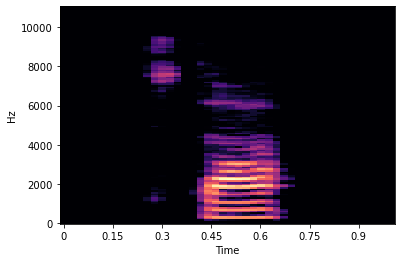

In [10]:
mode = 'mel'

sound_path = glob('../sound_to_csv/dataset/stop/*')[1]
voice_data, sampling_rate = librosa.load(sound_path)
incoming_data = get_img(voice_data, sampling_rate, mode)

librosa.display.specshow(incoming_data, sr=sampling_rate, x_axis='time', y_axis='hz')

In [11]:
width = 256
height = 32

incoming_data = cv2.resize(incoming_data, dsize=(width, height))
incoming_data = incoming_data.reshape(1, -1)
incoming_data_scaled = scaler.transform(incoming_data)

incoming_data_scaled

array([[1.1347514e-07, 1.1347514e-07, 1.1347514e-07, ..., 1.1347514e-07,
        1.1347514e-07, 1.1347514e-07]], dtype=float32)

### Prediction

In [12]:
predicted_target = clf.predict(incoming_data_scaled)

In [13]:
predicted_target

array([['stop']], dtype=object)